In [1]:
import pandas as pd
import psycopg2

## Loading data Tables from separate CSV files - 

In [2]:
atom_data = pd.read_csv("data/atom.csv")
atom_data.head()

,atom_id,molecule_id,element,type,charge
0,d100_1,d100,c,22,-0.128
1,d100_10,d100,h,3,0.132
2,d100_11,d100,c,29,0.002
3,d100_12,d100,c,22,-0.128
4,d100_13,d100,c,22,-0.128


In [3]:
atom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4893 entries, 0 to 4892
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   atom_id      4893 non-null   object 
 1   molecule_id  4893 non-null   object 
 2   element      4893 non-null   object 
 3   type         4893 non-null   int64  
 4   charge       4893 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 191.3+ KB


In [4]:
bond_data = pd.read_csv("data/bond.csv")
bond_data.head()

,atom1_id,atom2_id,type
0,d100_1,d100_2,7
1,d100_1,d100_7,1
2,d100_11,d100_12,7
3,d100_12,d100_13,7
4,d100_12,d100_17,1


In [5]:
bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   atom1_id  5243 non-null   object
 1   atom2_id  5243 non-null   object
 2   type      5243 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.0+ KB


In [6]:
molecule_data = pd.read_csv("data/molecule.csv")
molecule_data.head()

,molecule_id,ind1,inda,logp,lumo,mutagenic
0,d1,1,0,4.23,-1.246,yes
1,d10,1,0,4.62,-1.387,yes
2,d100,0,0,2.68,-1.034,no
3,d101,1,0,6.26,-1.598,yes
4,d102,1,0,2.40,-3.172,yes


In [7]:
molecule_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   molecule_id  188 non-null    object 
 1   ind1         188 non-null    int64  
 2   inda         188 non-null    int64  
 3   logp         188 non-null    float64
 4   lumo         188 non-null    float64
 5   mutagenic    188 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 8.9+ KB


## Data Model & ER diagram -

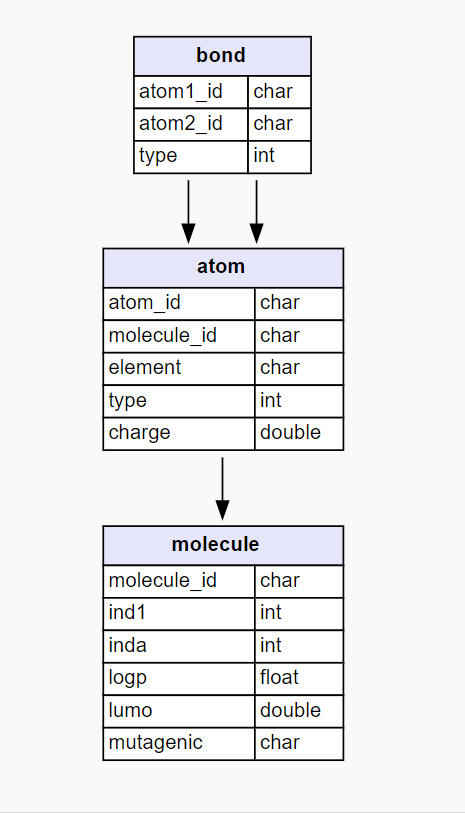

In [19]:
from IPython.display import Image, display
display(Image('E_R_diagram.PNG'))

## Creating a new database (Postgres) - 

In [8]:
def create_new_db():
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=****") # connecting to default db 
    conn.set_session(autocommit=True)
    
    cur = conn.cursor() # cursor to run SQL queries

    # creating the new database (removing all earlier versions, if present)
    cur.execute("DROP DATABASE IF EXISTS mutagenesis")
    cur.execute("CREATE DATABASE mutagenesis")
    cur.close()
    
    conn = psycopg2.connect("host=127.0.0.1 dbname=mutagenesis user=postgres password=admin")
    cur = conn.cursor()
    
    return cur, conn

In [9]:
cur, conn = create_new_db()

### Creating tables in the new database - 

In [10]:
create_atom_table = ("""
    CREATE TABLE IF NOT EXISTS atom (atom_id VARCHAR, 
                                    molecule_id VARCHAR, 
                                    element VARCHAR, 
                                    type NUMERIC, 
                                    charge NUMERIC)""")

In [11]:
cur.execute(create_atom_table)
conn.commit()

In [12]:
create_bond_table = ("""
    CREATE TABLE IF NOT EXISTS bond (atom1_id VARCHAR, 
                                    atom2_id VARCHAR, 
                                    type NUMERIC)""")

In [13]:
cur.execute(create_bond_table)
conn.commit()

In [14]:
create_molecule_table = ("""
    CREATE TABLE IF NOT EXISTS molecule (molecule_id VARCHAR, 
                                    ind1 NUMERIC, 
                                    inda NUMERIC, 
                                    logp NUMERIC, 
                                    lumo NUMERIC, 
                                    mutagenic VARCHAR)""")

In [15]:
cur.execute(create_molecule_table)
conn.commit()

### Inserting data into the tables - 

In [16]:
atom_table_insert = ("""INSERT INTO atom(
atom_id, 
molecule_id, 
element, 
type, 
charge)
VALUES (%s, %s, %s, %s, %s)
""")

for i,row in atom_data.iterrows():
    cur.execute(atom_table_insert, list(row))
    
conn.commit()

In [17]:
bond_table_insert = ("""INSERT INTO bond(
atom1_id, 
atom2_id, 
type)
VALUES (%s, %s, %s)
""")

for i,row in bond_data.iterrows():
    cur.execute(bond_table_insert, list(row))
    
conn.commit()

In [18]:
molecule_table_insert = ("""INSERT INTO molecule(
molecule_id, 
ind1,
inda,
logp,
lumo, 
mutagenic)
VALUES (%s, %s, %s, %s, %s, %s)
""")

for i,row in molecule_data.iterrows():
    cur.execute(molecule_table_insert, list(row))
    
conn.commit()